<a href="https://colab.research.google.com/github/arvindck/Internship-project-by-Arvind-CK/blob/master/project_by_Arvind_CK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME: ARVIND C K**

**The aim of this project is to do EDA and predict the car prices. Since the output or the dependent variable i.e car prices is continous and not categorical, it is a regression problem.**

**STEP - 1: IMPORTING THE DATASET, LIBRARIES, CHECKING DATATYPES, STATISTICAL SUMMARY, SHAPE, NULL VALUES ETC:-**



First we import the neccessary libraries and the dataset required for the project

In [1962]:
#importing the libraries i.e pandas, numpy, seaborn and matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1963]:
#importing the dataset
dataset=pd.read_csv('/content/data.csv')

After importing, we check the details about the dataset such as first 5 rows, last 5 rows, datatype, shape, null values etc

In [1964]:
#this gives the first 5 rows of the dataset
dataset.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [1965]:
#this gives the last 5 rows of the dataset
dataset.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [1966]:
#this gives how many rows and how many columns are there in the dataset i.e the dimension of the dataset
dataset.shape

(11914, 16)

In [1967]:
#this gives information about the dataset like how many rows are there, what are the column names, what are the datatypes of each column etc
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [1968]:
#this is used to describe the dataset i.e it gives the count, mean, std, min. value, max. value etc of the values in each column
#it gives only those columns which contain integer or float values since mean, min, max etc cannot be calculated for non numeric data
dataset.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [1969]:
#this gives the datatype of each column i.e datatype of the data contained in each column
dataset.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [1970]:
#this gives a list of all the column names in the dataset
dataset.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [1971]:
#this tells whether null values are present in each column or not
#True indicates that null values are present in that particular column and False indicates that null values are not present
dataset.isnull().any()

Make                 False
Model                False
Year                 False
Engine Fuel Type      True
Engine HP             True
Engine Cylinders      True
Transmission Type    False
Driven_Wheels        False
Number of Doors       True
Market Category       True
Vehicle Size         False
Vehicle Style        False
highway MPG          False
city mpg             False
Popularity           False
MSRP                 False
dtype: bool

In [1972]:
dataset.shape

(11914, 16)

**STEP - 2: DROPPING THE IRRELEVANT COLUMNS:-**

In [1973]:
#this is used to drop certain columns in the dataset
dataset.drop(['Number of Doors','Market Category'],axis=1,inplace=True)

Here we observe that 'Number of Doors' and 'Market Category' does not affect the Price of the car. Hence we do not require these columns so we drop them.

In [1974]:
#this is the new shape after dropping the columns
dataset.shape

(11914, 14)

**STEP - 3: RENAMING THE COLUMN NAMES:-**

Now we rename the column names

In [1975]:
#renaming the columns
dataset.rename(columns={'Engine HP':'HP','Engine Cylinders':'Cylinders','Transmission Type':'Transmission','Driven_Wheels':'Drive Mode','highway MPG':'mpg-H','city mpg':'mpg-C','MSRP':'Price'},inplace=True)


In [1976]:
dataset.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,mpg-H,mpg-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [1977]:
#this tells whether null values are present in each column or not
#True indicates that null values are present in that particular column and False indicates that null values are not present
dataset.isnull().any()

Make                False
Model               False
Year                False
Engine Fuel Type     True
HP                   True
Cylinders            True
Transmission        False
Drive Mode          False
Vehicle Size        False
Vehicle Style       False
mpg-H               False
mpg-C               False
Popularity          False
Price               False
dtype: bool

so here we find that the data in the columns 'Engine Fuel Type', 'HP', 'Cylinders' has missing values

In [1978]:
#this gives how many null values are present in each column
dataset.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     3
HP                  69
Cylinders           30
Transmission         0
Drive Mode           0
Vehicle Size         0
Vehicle Style        0
mpg-H                0
mpg-C                0
Popularity           0
Price                0
dtype: int64

**STEP - 4: REMOVING THE DUPLICATE VALUES AND HANDLING THE MISSING VALUES:-**

In [1979]:
#here the duplicate rows are displayed
duplicate_rows=dataset[dataset.duplicated()]
print("no. of duplicated rows are:", duplicate_rows)


no. of duplicated rows are:          Make     Model  Year  ... mpg-C  Popularity  Price
14        BMW  1 Series  2013  ...    19        3916  31500
18       Audi       100  1992  ...    17        3105   2000
20       Audi       100  1992  ...    17        3105   2000
24       Audi       100  1993  ...    17        3105   2000
25       Audi       100  1993  ...    17        3105   2000
...       ...       ...   ...  ...   ...         ...    ...
11481  Suzuki      X-90  1998  ...    22         481   2000
11603   Volvo      XC60  2017  ...    20         870  46350
11604   Volvo      XC60  2017  ...    23         870  40950
11708  Suzuki       XL7  2008  ...    15         481  29149
11717  Suzuki       XL7  2008  ...    16         481  27499

[721 rows x 14 columns]


Here we observe that there are 721 duplicate rows. So hence we need to drop them 

In [1980]:
#the duplicate rows are dropped
dataset=dataset.drop_duplicates()
dataset.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,mpg-H,mpg-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [1981]:
#this is the shape after dropping the duplicate rows
dataset.shape

(11193, 14)

Now we can try to fill in the missing values

In [1982]:
dataset.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     3
HP                  69
Cylinders           30
Transmission         0
Drive Mode           0
Vehicle Size         0
Vehicle Style        0
mpg-H                0
mpg-C                0
Popularity           0
Price                0
dtype: int64

Here we observe that there only 3 missing values under the column 'Enginer Fuel Type'. so hence we can drop those missing values since it does not affect the data much

In [1983]:
#this is used to drop those rows which contain missing values
dataset.dropna(subset=['Engine Fuel Type'],inplace=True)

Now we have dropped the missing values under 'Engine Fuel Type'

In [1984]:
dataset.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
HP                  69
Cylinders           30
Transmission         0
Drive Mode           0
Vehicle Size         0
Vehicle Style        0
mpg-H                0
mpg-C                0
Popularity           0
Price                0
dtype: int64

Now after dropping the missing values for 'Engine Fuel Type', We observe that there are 69 and 30 missing values for the columns 'HP' and 'Cylinders' respectively. Since the no. of missing values are somewhat big compared to the no. of missing values in 'Engine Fuel Type' we can try to fill in these missing values.

In [1985]:
#this gives the unique values of the data present that under that particular column
dataset['Cylinders'].unique()

array([ 6.,  4.,  5.,  8., 12.,  0., nan, 10.,  3., 16.])

In [1986]:
#this displays the list of columns containing null values
null_columns=dataset.columns[dataset.isnull().any()]
print(null_columns)

Index(['HP', 'Cylinders'], dtype='object')


In [1987]:
#this is used to calculate the median value among the data in the 'Cylinders' column
median1=dataset.Cylinders.median()
print(median1)


6.0


Here we find that the median is 6.0 for the column 'Cylinders'. Hence we can fill the missing values for the column with the median value

In [1988]:
#this is used to fill the null values in the specified column with the specified value
values = {'Cylinders': 6.0}
dataset.fillna(value=values,inplace=True)

Here we have filled the missing values for the column 'Cylinders' with the median value

In [1989]:
dataset.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
HP                  69
Cylinders            0
Transmission         0
Drive Mode           0
Vehicle Size         0
Vehicle Style        0
mpg-H                0
mpg-C                0
Popularity           0
Price                0
dtype: int64

After filling the null values for the 'Cylinders' column, we observe that only the column 'HP' is remaining to be filled. 'HP' contains 69 missing values

In [1990]:
#this is used to calculate the mean value for the data in the column 'HP'
mean1=dataset.HP.mean()
print(mean1)

253.42370290441508


Here we find that the mean value for the data in the column 'HP' is 253.4237.

In [1991]:
values1 = {'HP': 253}
dataset.fillna(value=values1,inplace=True)

Hence we fill all the missing values for the column 'HP' with the mean value.

In [1992]:
dataset.isnull().sum()

Make                0
Model               0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Vehicle Size        0
Vehicle Style       0
mpg-H               0
mpg-C               0
Popularity          0
Price               0
dtype: int64

Now hence we observe that all the missing values in the dataset are filled

In [1993]:
#this is the description about each column after filling the missing values
dataset.describe()

,Year,HP,Cylinders,mpg-H,mpg-C,Popularity,Price
count,11190.000000,11190.000000,11190.000000,11190.000000,11190.000000,11190.000000,1.119000e+04
mean,2010.717962,253.421090,5.666577,26.610992,19.733155,1558.373637,4.194310e+04
std,7.226330,109.836149,1.795193,8.980708,9.180922,1445.543831,6.155596e+04
min,1990.000000,55.000000,0.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,172.000000,4.000000,22.000000,16.000000,549.000000,2.160000e+04
50%,2015.000000,240.000000,6.000000,25.000000,18.000000,1385.000000,3.068500e+04
75%,2016.000000,303.000000,6.000000,30.000000,22.000000,2009.000000,4.304750e+04
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,5657.000000,2.065902e+06


**STEP - 5: CHECKING FOR OUTLIERS AND REMOVING THEM:-**

After filling the missing values, we need to check for all the outliers in the dataset. We need to remove these outliers since it will affect the machine learning model later. One way to check for outliers is to use a box and whiskers plot. The points beyond the two whiskers on either sides are said to be outliers. Hence we plot the boxplots for all the columns to check for the outliers

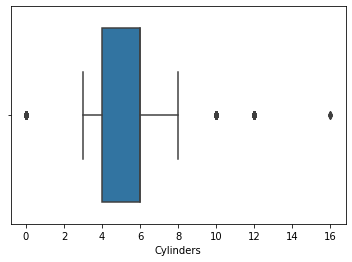

In [1994]:
#this is the boxplot for the column 'Cylinders'
sns.boxplot(dataset['Cylinders'])

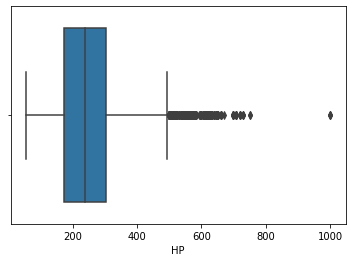

In [1995]:
sns.boxplot(dataset['HP'])

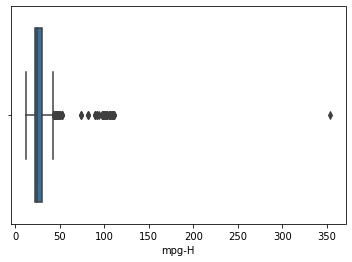

In [1996]:
sns.boxplot(dataset['mpg-H'])

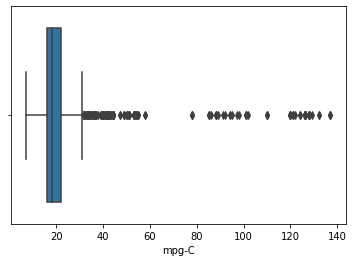

In [1997]:
sns.boxplot(dataset['mpg-C'])

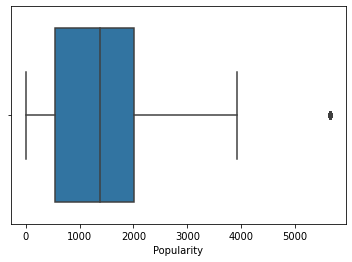

In [1998]:
sns.boxplot(dataset['Popularity'])

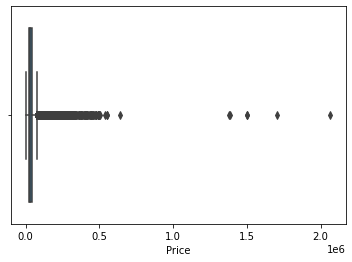

In [1999]:
sns.boxplot(dataset['Price'])

So here we observe by looking at all the boxplots that there are many outliers in the dataset i.e there are points beyond the whiskers of the boxplot. So hence we need to remove them

In [2000]:
dataset.describe()

,Year,HP,Cylinders,mpg-H,mpg-C,Popularity,Price
count,11190.000000,11190.000000,11190.000000,11190.000000,11190.000000,11190.000000,1.119000e+04
mean,2010.717962,253.421090,5.666577,26.610992,19.733155,1558.373637,4.194310e+04
std,7.226330,109.836149,1.795193,8.980708,9.180922,1445.543831,6.155596e+04
min,1990.000000,55.000000,0.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,172.000000,4.000000,22.000000,16.000000,549.000000,2.160000e+04
50%,2015.000000,240.000000,6.000000,25.000000,18.000000,1385.000000,3.068500e+04
75%,2016.000000,303.000000,6.000000,30.000000,22.000000,2009.000000,4.304750e+04
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,5657.000000,2.065902e+06


One way to remove the outliers is by using inter quantile range (IQR). So we can try doing this

In [2001]:
#here we set Q3 and Q1 values to the 75th percentile and 25th percentile values
Q3 = dataset.quantile(0.75)
Q1 = dataset.quantile(0.25)
Q1,Q3

(Year           2007.0
 HP              172.0
 Cylinders         4.0
 mpg-H            22.0
 mpg-C            16.0
 Popularity      549.0
 Price         21600.0
 Name: 0.25, dtype: float64, Year           2016.0
 HP              303.0
 Cylinders         6.0
 mpg-H            30.0
 mpg-C            22.0
 Popularity     2009.0
 Price         43047.5
 Name: 0.75, dtype: float64)

In [2002]:
#IQR is the difference between the third quantile and the first quantile
IQR = Q3 - Q1
print(IQR)

Year              9.0
HP              131.0
Cylinders         2.0
mpg-H             8.0
mpg-C             6.0
Popularity     1460.0
Price         21447.5
dtype: float64


In [2003]:
#here the outliers are removed i.e only those points are considered which are the range
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
dataset = dataset[~((dataset < (lower_limit)) | (dataset > (upper_limit))).any(axis=1)]
dataset.shape

(8638, 14)

Hence now the outliers are removed from all the columns and we observe the new shape after the outliers are removed

**STEP - 6: FINDING THE MOST REPRESENTED CAR BRANDS AND FINDING THE AVERAGE PRICE OF THOSE CAR BRANDS:-**

Next we need to find out the top 10 most represented car brands

In [2004]:
#this gives the percentage of each car brand
percent = dataset['Make'].value_counts()*100/sum(dataset['Make'].value_counts())
print(percent)


Chevrolet        11.970364
Toyota            7.281778
Volkswagen        5.962028
Nissan            5.938875
GMC               5.429498
Dodge             4.920120
Mazda             4.595971
Honda             4.318129
Suzuki            3.889789
Infiniti          3.727715
Cadillac          3.473026
Hyundai           2.801574
Audi              2.778421
Volvo             2.732114
Acura             2.685807
Subaru            2.546886
BMW               2.523732
Kia               2.500579
Buick             2.130123
Mitsubishi        2.072239
Chrysler          2.002778
Mercedes-Benz     1.979625
Lexus             1.887011
Pontiac           1.805974
Lincoln           1.690206
Saab              1.261866
Oldsmobile        1.215559
Land Rover        1.053485
FIAT              0.683028
Scion             0.636721
Plymouth          0.497800
Porsche           0.439917
Lotus             0.231535
HUMMER            0.196805
Alfa Romeo        0.057884
Maserati          0.046307
Genesis           0.034730
N

In [2005]:
#this is the top 10 car brands
top10 = percent.index[:10]
print(top10)

Index(['Chevrolet', 'Toyota', 'Volkswagen', 'Nissan', 'GMC', 'Dodge', 'Mazda',
       'Honda', 'Suzuki', 'Infiniti'],
      dtype='object')


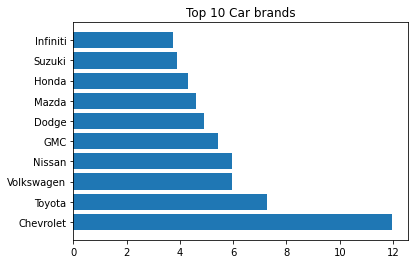

In [2006]:
#this gives the horizontal bar chart for the top 10 car brands
plt.barh(top10, width = percent[:10])
plt.title("Top 10 Car brands")
plt.show()

So here we observe from the bar chart that Chevrolet is the best car brand which is sold then comes Toyota then Volkswagen, Nissan.... etc

In [2007]:
#here the average prices for each of the top 10 brands are displayed
averageprices = dataset[['Make','Price']].loc[(dataset['Make'] == 'Chevrolet')|
                                       (dataset['Make'] == 'Toyota')|
                                       (dataset['Make'] == 'Volkswagen')|
                                       (dataset['Make'] == 'Nissan')|
                                       (dataset['Make'] == 'GMC')|
                                       (dataset['Make'] == 'Dodge')|
                                       (dataset['Make'] == 'Mazda')|
                                       (dataset['Make'] == 'Honda')|
                                       (dataset['Make'] == 'Suzuki')|
                                       (dataset['Make'] == 'Infiniti')].groupby('Make').mean()
print(averageprices)


                   Price
Make                    
Chevrolet   28252.488395
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Infiniti    43127.822981
Mazda       20830.670025
Nissan      28352.543860
Suzuki      18164.098214
Toyota      29011.750397
Volkswagen  29032.817476


So hence we observe the average prices for each brand is given

**STEP - 7: PLOTTING THE CORRELATION MATRIX:-**

In [2008]:
#this gives the correlation matrix for dataset
dataset.corr()


,Year,HP,Cylinders,mpg-H,mpg-C,Popularity,Price
Year,1.000000,0.330224,-0.094361,0.359681,0.323442,0.204245,0.592206
HP,0.330224,1.000000,0.740672,-0.464847,-0.562745,0.105627,0.742709
Cylinders,-0.094361,0.740672,1.000000,-0.698031,-0.750993,0.024944,0.391684
mpg-H,0.359681,-0.464847,-0.698031,1.000000,0.937958,0.081893,-0.127334
mpg-C,0.323442,-0.562745,-0.750993,0.937958,1.000000,0.071619,-0.201990
Popularity,0.204245,0.105627,0.024944,0.081893,0.071619,1.000000,0.115601
Price,0.592206,0.742709,0.391684,-0.127334,-0.201990,0.115601,1.000000


By looking at the correlation matrix we observe the following points:
1. There is high positive correlation between 'HP' and 'Price'
2. There is high positive correlation between 'HP' and 'Cylinders'
3. There is high negative correlation between 'mpg-H' and 'Cylinders'
4. There is high negative correlation between 'mpg-C' and 'Cylinders' 


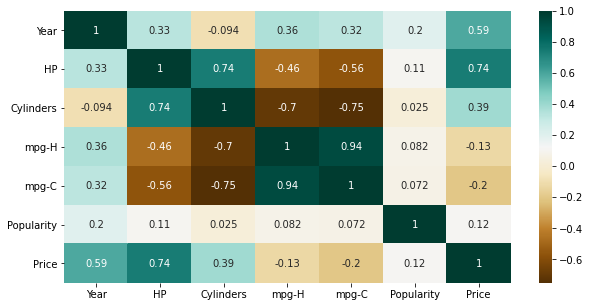

In [2009]:
#this gives the correlation matrix in the form of a heatmap
plt.figure(figsize=(10,5))
c=dataset.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

This is correlation matrix represented in the form of a heatmap. It looks more better

**STEP - 8: PLOTTING DIFFERENT GRAPHS FOR DIFFERENT COLUMNS AND TRYING TO FIND HOW DIFFERENT VARIABLES AFFECT THE PRICE OF THE CAR:-**

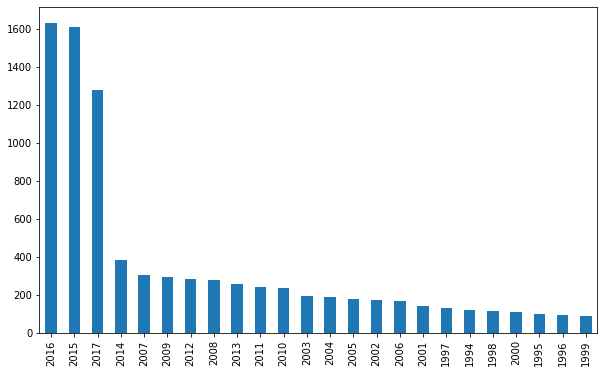

In [2010]:
#this gives the bar chart between the years and no. of cars sold i.e in a particular year how many cars are sold
dataset['Year'].value_counts().plot.bar(figsize=(10,6))


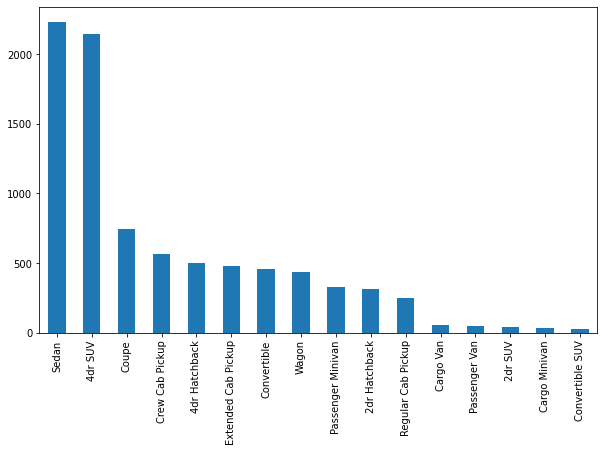

In [2011]:
#this gives the bar chart between the Vehicle Style and no. of cars sold i.e for a particular Vehicle style, how many cars are sold
dataset['Vehicle Style'].value_counts().plot.bar(figsize=(10,6))

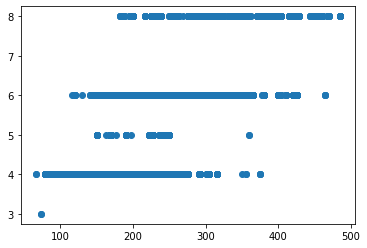

In [2012]:
#this is the scatter plot between 'HP' and 'Cylinders'
plt.scatter(dataset['HP'],dataset['Cylinders'])

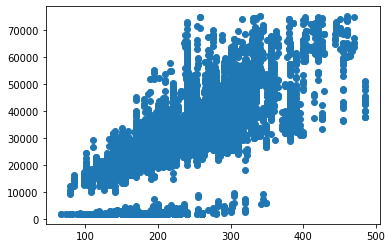

In [2013]:
#this is the scatter plot between 'HP' and 'Price'
#since there is a high correlation between hp and price this scatter plot is plotted
plt.scatter(dataset['HP'],dataset['Price'])

Text(0.5, 0, 'Vehicle count')

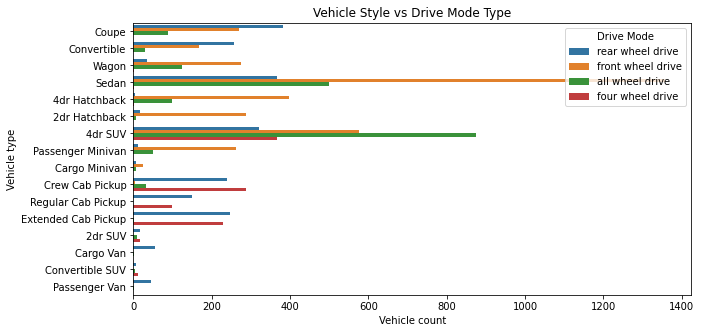

In [2014]:
#this gives the no. of cars sold for a particular Vehicle Type and a particular Drive Mode
plt.figure(figsize=(10,5))
sns.countplot(y='Vehicle Style',data=dataset, hue='Drive Mode')
plt.title('Vehicle Style vs Drive Mode Type')
plt.ylabel('Vehicle type')
plt.xlabel('Vehicle count')

In [2015]:
#dividing the price into groups like <20k,20-39k etc
dr1=pd.DataFrame()
dr1=pd.cut(dataset['Price'],[0,20000,40000,60000,80000,100000,600000],labels=['<20k','20-39k','40-59k','60-79k','80-99k','>100k'],include_lowest=True)
dr1=dr1.astype(object)





Text(0.5, 1.0, 'Price group pie chart')

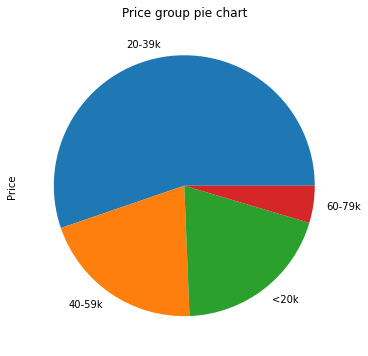

In [2016]:
#here the pie chart is plotted for the price group
(dr1.value_counts()/len(dr1) * 100).plot.pie(figsize=(10,6))
plt.title('Price group pie chart')

Here we observe that majority of the price is between 20-39k from the pie chart

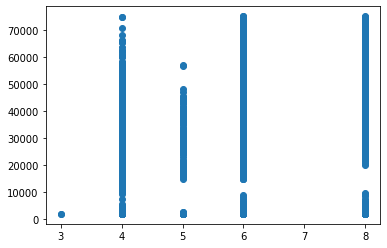

In [2017]:
#scatter plot between 'Cylinders' and 'Price'
plt.scatter(dataset['Cylinders'],dataset['Price'])

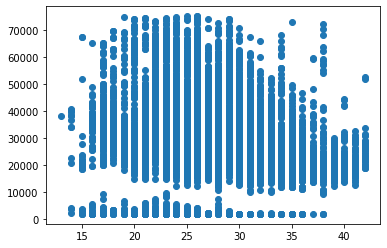

In [2018]:
#scatter plot between 'mpg-H' and 'Price'
plt.scatter(dataset['mpg-H'],dataset['Price'])

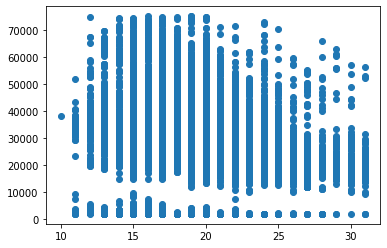

In [2019]:
plt.scatter(dataset['mpg-C'],dataset['Price'])

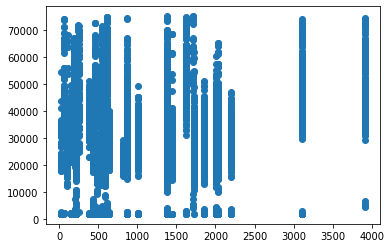

In [2020]:
plt.scatter(dataset['Popularity'],dataset['Price'])

Now the exploratory data analysis (EDA) of the dataset is done. Now we need to build a ML model to predict the car prices.

In our dataset few columns are non numeric i.e they are in the form of characters. We cannot build a regression model with non- numeric data. Sklearn only accepts numeric data. So hence we need to encode these non-numeric data to numeric form before building our ML model 

**ENCODING THE DATA:-**

**Here Label Encoding is used to encode all the non-numeric data i.e the character data.** 

In [2021]:
#label encoding is done by importing the sklearn library
Z = dataset.iloc[:,:].values
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
Z[:,0] = labelencoder_X.fit_transform(Z[:,0])
Z[:,1] = labelencoder_X.fit_transform(Z[:,1])
Z[:,3] = labelencoder_X.fit_transform(Z[:,3])
Z[:,6] = labelencoder_X.fit_transform(Z[:,6])
Z[:,7] = labelencoder_X.fit_transform(Z[:,7])
Z[:,8] = labelencoder_X.fit_transform(Z[:,8])
Z[:,9] = labelencoder_X.fit_transform(Z[:,9])


Y = pd.DataFrame(Z)


In [2022]:
Y

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,3,3,2011,7,335,6,2,3,0,8,26,19,3916,46135
1,3,2,2011,7,300,6,2,3,0,6,28,19,3916,40650
2,3,2,2011,7,300,6,2,3,0,8,28,20,3916,36350
3,3,2,2011,7,230,6,2,3,0,8,28,18,3916,29450
4,3,2,2011,7,230,6,2,3,0,6,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8633,0,638,2012,7,300,6,1,0,2,2,23,16,204,46120
8634,0,638,2012,7,300,6,1,0,2,2,23,16,204,56670
8635,0,638,2012,7,300,6,1,0,2,2,23,16,204,50620
8636,0,638,2013,6,300,6,1,0,2,2,23,16,204,50920


In [2023]:
Y.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,3,3,2011,7,335,6,2,3,0,8,26,19,3916,46135
1,3,2,2011,7,300,6,2,3,0,6,28,19,3916,40650
2,3,2,2011,7,300,6,2,3,0,8,28,20,3916,36350
3,3,2,2011,7,230,6,2,3,0,8,28,18,3916,29450
4,3,2,2011,7,230,6,2,3,0,6,28,18,3916,34500


**So hence here we observe that all the columns are in the form of numbers and we have encoded all the values successfully. Now we can pass these values to build our ML model.**

In [2024]:
#all the columns except the price column are the independent variables hence it is stored in X
#only the price column is a dependent variable hence it is stored in y
X = Y[[0,1,2,3,4,5,6,7,8,9,10,11,12]].values
y = Y[13].values
X,y



(array([[3, 3, 2011, ..., 26, 19, 3916],
        [3, 2, 2011, ..., 28, 19, 3916],
        [3, 2, 2011, ..., 28, 20, 3916],
        ...,
        [0, 638, 2012, ..., 23, 16, 204],
        [0, 638, 2013, ..., 23, 16, 204],
        [19, 639, 2006, ..., 26, 17, 61]], dtype=object),
 array([46135, 40650, 36350, ..., 50620, 50920, 28995], dtype=object))

Here we observe that the dependent variables and the independent variable is displayed

Next we also need to scale the data for the effecient model building

**SCALING THE DATA:-**

In [2025]:
#the data is scaled using the sklearn library
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
st_y= StandardScaler()  
X= st_x.fit_transform(X)    
y= st_x.fit_transform(y.reshape(-1,1)) 

Now the data is scaled. Next we split the data into train and test in the 80:20 ratio

**STEP - 9 & 10: SPLITTING THE DATASET INTO THE 80:20 RATIO AND BUILDING THE ML MODEL, TRYING OUT VARIOUS ML ALGORITHMS AND CHECKING THE PERFORMANCE:-**

In [2026]:
#splitting the data in the 80:20 ratio using sklearn library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

Hence X_train and y_train contain 80% of the data and X_test and y_test contain 20% of the data

**Now we apply different ML algorithms to build our ML model and predict the results which are shown below:**

The algorithms which I am going to apply are -
1. Linear Regression
2. Support Vector Machines
3. Random Forest

**LINEAR REGRESSION**

In [2027]:
#fitting Linear Regression model to the training data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [2028]:
#predicting the prices after doing linear regression
y_pred = regressor.predict(X_test)
y_pred


array([[ 0.54522653],
       [ 1.17275251],
       [ 1.02608835],
       ...,
       [-1.42417172],
       [-1.36564978],
       [ 1.02283059]])

So here we see that all the prices predicted by the Linear Regression model are stored in y_pred and is displayed

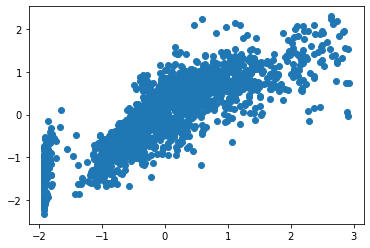

In [2029]:
#scatter plot between test prices and predicted prices
plt.scatter(y_test,y_pred)

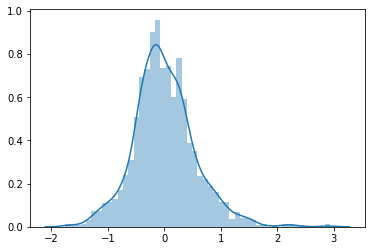

In [2030]:
#dist plot between test prices and predicted prices
sns.distplot((y_test-y_pred),bins=50)

In [2031]:
#calculating mean absolute error, root mean square error and r2 score using the metics from sklearn library
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))     
r2 = metrics.r2_score(y_test,y_pred)  
print(mae)
print(rmse)
print(r2)


0.4160886116799633
0.5511745337997189
0.6998772351265817


In [2032]:
print("Test Accuracy = ", regressor.score(X_test, y_test))

Test Accuracy =  0.6998772351265817


Hence here we observe that the **test accuracy for Linear Regression is 0.6998**. So **Linear Regression has predicted 69% accurately. (approx. 70%)**.

**SUPPORT VECTOR MACHINES**

In [2033]:
#fitting support vector machines to the training data
from sklearn.svm import SVR 
support = SVR(kernel = 'rbf') 
support.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [2034]:
#predicting the prices after doing SVR
y_pred = support.predict(X_test)                     
y_pred

array([ 0.98897106,  1.19326531,  0.35498541, ..., -1.04175092,
       -0.94142558,  1.00812384])

So here we see that all the prices predicted by the Support vector regressor model are stored in y_pred and is displayed

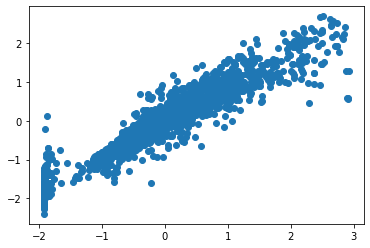

In [2035]:
plt.scatter(y_test,y_pred)

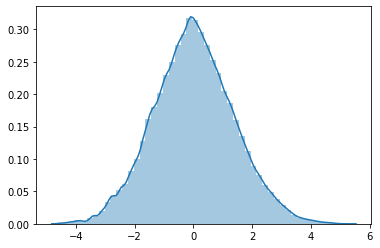

In [2036]:
sns.distplot((y_test-y_pred),bins=50)

In [2037]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))     
r2 = metrics.r2_score(y_test,y_pred)  
print(mae)
print(rmse)
print(r2)


0.23866460981027354
0.34576802252889766
0.8818890115058492


In [2038]:
print("Test Accuracy = ", support.score(X_test, y_test))


Test Accuracy =  0.8818890115058492


Hence here we observe that the **test accuracy for SVM is 0.881**. So this has more accuracy and has more accurately predicted than Linear Regression. **So SVM has predicted 88% accurately**.



**RANDOM FOREST REGRESSOR**

In [2039]:
from sklearn.ensemble import RandomForestRegressor

In [2040]:
model=RandomForestRegressor(n_estimators=300)

In [2041]:
#fitting random forest to the training data
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [2042]:
#predicting the prices after doing random forest
y_pred=model.predict(X_test)                     
y_pred

array([ 1.48024009,  1.08909286,  0.28869958, ..., -1.06205808,
       -0.69211309,  0.96790369])

So here we see that all the prices predicted after implemeting random forest algorithm are stored in y_pred and is displayed

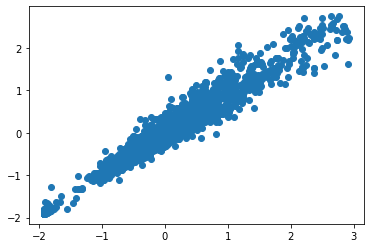

In [2043]:
plt.scatter(y_test,y_pred)

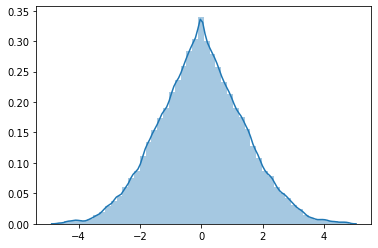

In [2044]:
sns.distplot((y_test-y_pred),bins=50)

In [2045]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))     
r2 = metrics.r2_score(y_test,y_pred)  
print(mae)
print(rmse)
print(r2)


0.16553230630722968
0.2283531873617191
0.9484848691095719


In [2046]:
print("Test Accuracy = ", model.score(X_test, y_test))

Test Accuracy =  0.9484848691095719


Hence here we observe that the **test accuracy for Random Forest is 0.94848**. So this has more accuracy and has more predicted than Linear Regression and SVM. **So Random Forest has predicted 94% accurately (approx 95%)**. 

**Hence the final conclusion is Random forest is giving the best prediction when compared to all the other algorithms.**